# Phase 1 - Week 4 - Day 2 PM - MLOps

In this tutorial, we will use the breast cancer dataset to predict whether someone will get breast cancer or not. For more info, you can visit this [link](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

Breast cancer is one of the leading causes of death worldwide. Due to its deadly nature, it is crucial that someone with breast cancer is not predicted by the model as not having breast cancer. Therefore, in this particular problem, **minimizing False Negatives will be emphasized**, or in other words, we will **use recall metrics** as a reference for model performance.

To demonstrate the usefulness of MLOps, we will create experiments without `Weights & Bias` and `with Weights & Bias`.

# A. Without Weights & Biases

In [ ]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [ ]:
# Data loading

cancer_df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
cancer_df['target'] = load_breast_cancer().target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Check dataset

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Split between `X` and `y`
X = cancer_df.drop('target', axis=1)
y = cancer_df['target']

# Split dataset into train-Set and test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (426, 30)
Test size  :  (143, 30)


In [ ]:
# Feature scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
%%time

# Define the grid search parameters
grid_search_params = {'n_estimators': [100, 200, 300],
                      'max_depth': [10, 20, 30],
                      'min_samples_split': [2, 4, 6]}

# Train with Grid Search
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

rf_gridcv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 1.56 s, sys: 251 ms, total: 1.81 s
Wall time: 1min 31s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [ ]:
# Get Best Hyperparameters

rf_gridcv.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
# Get Best Estimator

rf_gridcv_best = rf_gridcv.best_estimator_

Recall - Test Set     :  0.9666666666666667 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143
 

Confusion Matrix      : 


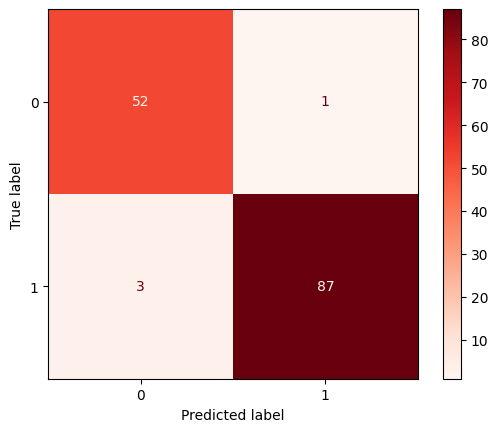

In [ ]:
# Check Performance Model against Test-Set

y_pred_test = rf_gridcv_best.predict(X_test_scaled)

print('Recall - Test Set     : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_scaled, y_test, cmap='Reds'))

---
**IMPORTANT NOTES**

The advantage of performing Hyperparameter Tuning with GridSearchCV or RandomSearchCV is that you obtain a model with the best performance.

However, on the other hand, when conducting Hyperparameter Tuning, we cannot dig deeper into insights such as:

1. Which hyperparameters have a significant impact on the model?

2. What is the effect if one hyperparameter is increased while others are decreased?

3. How does each combination of trained hyperparameters perform?

# B. With Weights & Biases (W&B)

Weight & Biases, also known as W&B or wandb, is a platform and set of tools designed to help Data Scientists and Machine Learning Engineer manage and monitor their machine learning experiments and models more effectively.

Weights & Biases is a valuable tool to streamline MLOps practices, **improve experiment tracking and collaboration, and gain deeper insights into performance of the models**. It complements other MLOps tools and practices and helps teams manage the end-to-end machine learning lifecycle more efficiently.

<img src='http://wandb.me/mini-diagram'>

## B.1 - Setup

Before you run the code blow, make sure you have logged in to [Weights & Biases site](https://wandb.ai/).

You need an API key to connect Google Colab with W&B site.

1. Once you've signed in to www.wandb.ai, the API key will be on the [Authorize page](https://wandb.ai/authorize), OR

2. You can find this key in by click your `Photo Account` and select menu `User settings`. The API key will be in section `Danger Zone`.

In [ ]:
# Install W&B library
!pip install wandb

# Import the library
import wandb

# Login & verification
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=7dd7d89a4069d87647722275d971bf69daf800433365db2b8cae20e82b16a007
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## B.2 - Sweeps

To perform Hyperparameter Tuning, we will use the Sweep feature from W&B. There are just 3 simple steps:

1. **Define the sweep:**
   We do this by creating a dictionary-like object that specifies the sweep: which parameters to search through, which search strategy to use, which metric to optimize.

2. **Initialize the sweep:**
   With one line of code we initialize the sweep and pass in the dictionary of sweep configurations:
   ```
   sweep_id = wandb.sweep(sweep_config)
   ```

3. **Run the sweep agent:**
   Also accomplished with one line of code, we call w`andb.agent()` and pass the `sweep_id` along with a function that defines your model architecture and trains it:
   ```
   wandb.agent(sweep_id, function=train)
   ```

*You can read the documentation of sweeps from this sources : [source 1](https://docs.wandb.ai/ref/python/sweep) and [source 2](https://docs.wandb.ai/guides/sweeps/define-sweep-configuration)*

### Random Forest

In [ ]:
# Define sweep configuration of Random Forest
sweep_config = {
    "method": "grid",
    "metric": {
      "name": "recall",
      "goal": "maximize"
    },
    "parameters": {
        "n_estimators": {
            "values": [100, 200, 300]
        },
        "max_depth": {
            "values": [10, 20, 30]
        },
        "min_samples_split": {
            "values": [2, 4, 6]
        },
    }
}

# Initialize the Sweep
project_name = 'Hacktiv8 - MLOps'
save_code = True
group = 'random-forest-models'

sweep_id = wandb.sweep(sweep_config, project=project_name)

Create sweep with ID: gj73jwl5
Sweep URL: https://wandb.ai/danundata/Hacktiv8%20-%20MLOps/sweeps/gj73jwl5


In [ ]:
# Function to train Random Forest with W&B

def train_random_forest():
  config_defaults = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2
  }

  wandb.init(config=config_defaults, # defaults are over-ridden during the sweep
             project=project_name,
             save_code=save_code,
             group=group)
  config = wandb.config

  ## Fit model on train-set
  model = RandomForestClassifier(n_estimators=config.n_estimators,
                                 max_depth=config.max_depth,
                                 min_samples_split=config.min_samples_split,
                                 random_state=42)
  model.fit(X_train_scaled, y_train)

  # Make predictions on test-set
  labels=[0, 1]
  y_pred_test = model.predict(X_test_scaled)
  y_pred_probas = model.predict_proba(X_test_scaled)

  f1 = f1_score(y_test, y_pred_test)
  accuracy = accuracy_score(y_test, y_pred_test)
  precision = precision_score(y_test, y_pred_test)
  recall = recall_score(y_test, y_pred_test)

  print('Recall - Test Set   : ', recall, '\n')

  wandb.log({'f1_score': f1, 'precision': precision, 'recall': recall, 'accuracy': accuracy})


**IMPORTANT NOTES**

To run the sweep, you can execute the code below. However, if you choose `method=random` (Random Search), make sure you specify how many combinations that you will search. To do this, specify the parameter `count`, so your code will be

```
wandb.agent(sweep_id, train_random_forest, count=10)
```

The program will search 10 different combinations.

In [ ]:
# Run the Sweep with an agent
%%time
wandb.agent(sweep_id, train_random_forest)

wandb: Agent Starting Run: n8kiduso with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
wandb: Currently logged in as: danundata. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: adcst6it with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: f1m9hz5j with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: fyuy8wat with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 100
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xqqtznwp with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: hlu25qzo with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: ozcrpmi9 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 100
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: bjjevz52 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: cstorby8 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: webdq59l with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: j9kwrdly with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: 3blfl8ou with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: 9yo7paej with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 100
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: 4rwauvcl with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: yblf23s9 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ey4q8c16 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 100
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f2gs9cx0 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: v9p5ckdh with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: tr4lf2vp with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: q9610vcv with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: 775qdw3a with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: i54rujpl with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 100
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: dc3loo1y with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: z54yk0v9 with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9777777777777777 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97902
f1_score,0.98324
precision,0.98876
recall,0.97778


wandb: Agent Starting Run: 8xw3a329 with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 100
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: w232h7tp with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 200
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Agent Starting Run: kwmojbh1 with config:
wandb: 	max_depth: 30
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 300
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Recall - Test Set   :  0.9666666666666667 



accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.97203
f1_score,0.97753
precision,0.98864
recall,0.96667


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


CPU times: user 37.1 s, sys: 1.33 s, total: 38.4 s
Wall time: 11min 46s


## B.3 - Visualization

If you open the project `Hacktiv8 - MLOps` that you just created in W&B site, it will look like this.

<img src='https://i.ibb.co/GPfjxrd/wandb-01.png'>

You can click run groups `Group: random-forest-models`. It will looks like this

<img src='https://i.ibb.co/3vbqkTX/wandb-02.png'>

You can create various plot from these 27 models. For example, click on `Add panel` >> `Parallel coordinates`. Configure your plot like image below.

<img src='https://i.ibb.co/c21fmX9/wandb-03.png'>

You can also check which hyperparameter have a significant impact on the model by display plot `Parameter importance`.

<img src='https://i.ibb.co/hmNJMCb/wandb-04.png'>

As you can see, all models with `min_samples_split=6` will have low performance. So, from this project, we can say that hyperparameter `min_samples_split` must be less than `6`.